In [147]:
%pylab inline
import geopandas as gpd
import pandas as pd
import os
# !pip install mplleaflet
import mplleaflet

Populating the interactive namespace from numpy and matplotlib


In [4]:
fish_pass = 'ADFG/ADFG_fish_passage.shp'
fp = gpd.read_file(fish_pass)
regs = 'HUC8_rebuild/output/sasap_regions.shp'
regions = gpd.read_file(regs)

In [5]:
fp = fp.to_crs(epsg=3338)
regions = regions.to_crs(epsg=3338)

In [164]:
fp.RGGRating.head()

index_left
0      Red
1    Green
2      Red
3    Green
4      Red
Name: RGGRating, dtype: object

In [7]:
fp.RGGRating.count()

2930

In [8]:
fp2 = fp[['geometry', 'RGGRating']]
fp2.head(5)

,geometry,RGGRating
0,POINT (83811.68299580242 819266.9230174191),Red
1,POINT (213872.4420121688 2252881.915418045),Green
2,POINT (213536.4334304724 2250613.46924101),Red
3,POINT (207221.6008933302 2235195.704555049),Green
4,POINT (210232.879883608 2156742.824674348),Red


In [10]:
reg_rgg = gpd.sjoin(fp2, regions, op='within').drop('index_right', axis='columns')

In [16]:
reg_rgg.head()

,geometry,RGGRating,region_id,region
0,POINT (83811.68299580242 819266.9230174191),Red,6,Kodiak
2220,POINT (80366.30333690392 874133.2270201525),Gray,6,Kodiak
2221,POINT (79595.26420932778 873985.3460359153),Red,6,Kodiak
2222,POINT (91562.86612378767 871690.9983501389),Red,6,Kodiak
2223,POINT (81048.90137418527 871092.781904645),Black,6,Kodiak


In [111]:
regions.head()

,region_id,region,geometry
index_right,,,
0,1,Aleutian Islands,(POLYGON ((-1156665.959195634 420855.093106978...
1,2,Arctic,"POLYGON ((571289.9424044377 2143072.479559345,..."
2,3,Bristol Bay,(POLYGON ((-339688.5870041371 973904.876117813...
3,4,Chignik,(POLYGON ((-114381.9018728056 649966.806579367...
4,5,Copper River,"POLYGON ((561012.0068005103 1148300.750064242,..."


In [17]:
reg_rgg.count()

geometry     2929
RGGRating    2929
region_id    2929
region       2929
dtype: int64

In [18]:
fp2.count()

geometry     2930
RGGRating    2930
dtype: int64

In [21]:
foo = reg_rgg.drop('region_id', axis='columns').groupby(['region','RGGRating'])


In [22]:
bar = foo.count()
blah = bar.unstack('RGGRating')
blah.columns = blah.columns.get_level_values(1)
# blah.assign(region=blah.index)
blah2 = blah.join(regions.set_index('region'), on='region', how='outer')
blah2

,,Black,Gray,Green,Red,region_id,geometry
region,,,,,,,
Aleutian Islands,1.0,48.0,22.0,8.0,32.0,1,(POLYGON ((-1156665.959195634 420855.093106978...
Arctic,NaN,3.0,8.0,13.0,8.0,2,"POLYGON ((571289.9424044377 2143072.479559345,..."
Bristol Bay,NaN,6.0,7.0,5.0,7.0,3,(POLYGON ((-339688.5870041371 973904.876117813...
Cook Inlet,1.0,72.0,213.0,302.0,474.0,9,"(POLYGON ((35214.97605528703 1002456.87086566,..."
Copper River,NaN,NaN,62.0,31.0,112.0,5,"POLYGON ((561012.0068005103 1148300.750064242,..."
Kodiak,NaN,75.0,25.0,22.0,67.0,6,(POLYGON ((115112.5187827438 983292.9990368463...
Norton Sound,NaN,2.0,19.0,9.0,76.0,10,(POLYGON ((-848356.9600070229 1636692.01922057...
Prince William Sound,NaN,4.0,17.0,6.0,16.0,11,(POLYGON ((426007.0728565209 1087250.373112139...
Southeast,NaN,35.0,193.0,201.0,296.0,12,(POLYGON ((1287776.763303712 744574.0859671865...


In [32]:
blah2['RedandGray'] = (blah2.Gray + blah2.Red)

In [88]:
blah3 = blah2.fillna(0)
blah3

,,Black,Gray,Green,Red,region_id,geometry,RedandGray
region,,,,,,,,
Aleutian Islands,1.0,48.0,22.0,8.0,32.0,1,(POLYGON ((-1156665.959195634 420855.093106978...,54.0
Arctic,0.0,3.0,8.0,13.0,8.0,2,"POLYGON ((571289.9424044377 2143072.479559345,...",16.0
Bristol Bay,0.0,6.0,7.0,5.0,7.0,3,(POLYGON ((-339688.5870041371 973904.876117813...,14.0
Cook Inlet,1.0,72.0,213.0,302.0,474.0,9,"(POLYGON ((35214.97605528703 1002456.87086566,...",687.0
Copper River,0.0,0.0,62.0,31.0,112.0,5,"POLYGON ((561012.0068005103 1148300.750064242,...",174.0
Kodiak,0.0,75.0,25.0,22.0,67.0,6,(POLYGON ((115112.5187827438 983292.9990368463...,92.0
Norton Sound,0.0,2.0,19.0,9.0,76.0,10,(POLYGON ((-848356.9600070229 1636692.01922057...,95.0
Prince William Sound,0.0,4.0,17.0,6.0,16.0,11,(POLYGON ((426007.0728565209 1087250.373112139...,33.0
Southeast,0.0,35.0,193.0,201.0,296.0,12,(POLYGON ((1287776.763303712 744574.0859671865...,489.0


In [90]:
final_df = blah3.filter(['region_id', 'geometry', 'Black', 'Green', 'Gray', 'Red', 'RedandGray'], axis=1)
final_df

,region_id,geometry,Black,Green,Gray,Red,RedandGray
region,,,,,,,
Aleutian Islands,1,(POLYGON ((-1156665.959195634 420855.093106978...,48.0,8.0,22.0,32.0,54.0
Arctic,2,"POLYGON ((571289.9424044377 2143072.479559345,...",3.0,13.0,8.0,8.0,16.0
Bristol Bay,3,(POLYGON ((-339688.5870041371 973904.876117813...,6.0,5.0,7.0,7.0,14.0
Cook Inlet,9,"(POLYGON ((35214.97605528703 1002456.87086566,...",72.0,302.0,213.0,474.0,687.0
Copper River,5,"POLYGON ((561012.0068005103 1148300.750064242,...",0.0,31.0,62.0,112.0,174.0
Kodiak,6,(POLYGON ((115112.5187827438 983292.9990368463...,75.0,22.0,25.0,67.0,92.0
Norton Sound,10,(POLYGON ((-848356.9600070229 1636692.01922057...,2.0,9.0,19.0,76.0,95.0
Prince William Sound,11,(POLYGON ((426007.0728565209 1087250.373112139...,4.0,6.0,17.0,16.0,33.0
Southeast,12,(POLYGON ((1287776.763303712 744574.0859671865...,35.0,201.0,193.0,296.0,489.0


In [168]:
final_df.drop('geometry', axis='columns').to_csv('HabMetricsOut/fish_passage/fp_regions.csv')

In [131]:
abc = gpd.GeoDataFrame(blah3, geometry='geometry')

In [132]:
abc.crs = {'init': 'epsg:3338'}

In [133]:
abc.to_crs(epsg=3338)

,,Black,Gray,Green,Red,region_id,geometry,RedandGray
region,,,,,,,,
Aleutian Islands,1.0,48.0,22.0,8.0,32.0,1,(POLYGON ((-1156665.959195634 420855.093106978...,54.0
Arctic,0.0,3.0,8.0,13.0,8.0,2,"POLYGON ((571289.9424044369 2143072.479559349,...",16.0
Bristol Bay,0.0,6.0,7.0,5.0,7.0,3,(POLYGON ((-339688.5870041371 973904.876117813...,14.0
Cook Inlet,1.0,72.0,213.0,302.0,474.0,9,"(POLYGON ((35214.97605528703 1002456.87086566,...",687.0
Copper River,0.0,0.0,62.0,31.0,112.0,5,"POLYGON ((561012.0068005103 1148300.750064242,...",174.0
Kodiak,0.0,75.0,25.0,22.0,67.0,6,(POLYGON ((115112.5187827438 983292.9990368463...,92.0
Norton Sound,0.0,2.0,19.0,9.0,76.0,10,(POLYGON ((-848356.9600070229 1636692.01922057...,95.0
Prince William Sound,0.0,4.0,17.0,6.0,16.0,11,"(POLYGON ((426007.0728565208 1087250.37311214,...",33.0
Southeast,0.0,35.0,193.0,201.0,296.0,12,(POLYGON ((1287776.763303712 744574.0859671865...,489.0


In [135]:
abc.to_file('fp_regions.shp')

UnboundLocalError: local variable 'key' referenced before assignment

In [136]:
dog = gpd.GeoDataFrame(final_df, geometry='geometry')

In [139]:
dog.crs = {'init': 'epsg:3338'}

In [165]:
dog.to_file('HabMetricsOut/fish_passage/fp_regions.shp')

In [166]:
test_gdf = gpd.read_file('HabMetricsOut/fish_passage/fp_regions.shp')

In [167]:
test_gdf.to_crs(epsg=3338)

,region_id,Black,Green,Gray,Red,RedandGray,geometry
0,1,48.0,8.0,22.0,32.0,54.0,(POLYGON ((-1156665.959195634 420855.093106978...
1,2,3.0,13.0,8.0,8.0,16.0,"POLYGON ((571289.9424044369 2143072.479559349,..."
2,3,6.0,5.0,7.0,7.0,14.0,(POLYGON ((-339688.5870041371 973904.876117813...
3,9,72.0,302.0,213.0,474.0,687.0,"(POLYGON ((35214.97605528703 1002456.87086566,..."
4,5,0.0,31.0,62.0,112.0,174.0,"POLYGON ((561012.0068005103 1148300.750064242,..."
5,6,75.0,22.0,25.0,67.0,92.0,(POLYGON ((115112.5187827438 983292.9990368463...
6,10,2.0,9.0,19.0,76.0,95.0,(POLYGON ((-848356.9600070229 1636692.01922057...
7,11,4.0,6.0,17.0,16.0,33.0,"(POLYGON ((426007.0728565208 1087250.37311214,..."
8,12,35.0,201.0,193.0,296.0,489.0,(POLYGON ((1287776.763303712 744574.0859671865...
9,13,30.0,123.0,72.0,206.0,278.0,POLYGON ((-375317.9778843221 1473997.623078777...


Woohoo it worked! Looks like it's just .crs to set the crs and to_crs when importing a .shp (or setting a gdf I should say)

TypeError: Invalid dimensions for image data

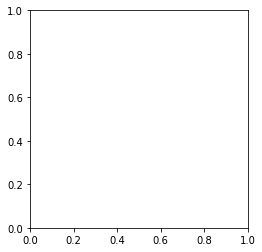

In [163]:
# test_gdf.plot(column='Gray', cmap='Blues')
imshow(test_gdf.Gray[0])
# plt.colorbar()
# plt.show()
